<a href="https://colab.research.google.com/github/jnagabooshanam-hub/ChurnPrediction_Project/blob/main/Customer_Churn_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


# 2. LOAD DATA


In [2]:
import pandas as pd
url = r"https://raw.githubusercontent.com/jnagabooshanam-hub/ChurnPrediction_Project/refs/heads/main/.github/workflows/Customer-Churn.csv"
df = pd.read_csv(url,on_bad_lines='skip')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 3. DATA TYPE FIXING

In [ ]:
# check if any data is null
df.isnull().sum()

#date_cols = ["date_time", "signup_date_time", "cancel_date_time"]

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
churn               0
dtype: int64

In [173]:
#print(df.columns.tolist())
#df.head()
#for col in date_cols:
#    df[col] = pd.to_datetime(df[col], errors="coerce")

In [174]:
#df.info()

# 4. TARGET VARIABLE (CHURN)

In [175]:
#df["churn"] = df["cancel_date_time"].notna().astype(int)

In [176]:
# Note - If the customer has a cancel date → "True" = 1

        # If it's empty/NaN → "False" - 0

In [177]:
#df["churn"]

# 5. FEATURE ENGINEERING

In [178]:
#today = pd.Timestamp.today()

In [179]:
#print(today)

In [ ]:
# Tenure in days :

#df["tenure_days"] = (df["cancel_date_time"].fillna(today) - df["signup_date_time"]).dt.days


** Note :- “For each customer, calculate how many days they were active. If they canceled, use their cancel date.
* If they haven’t canceled, use today’s date.”

* Formula = tenure_days = (end_date - start_date).days

* start_date = signup_date_time (when the customer joined)

* end_date = cancel_date_time if exists, else today (current date)


In [ ]:
*df["cancel_date_time"]
*df["SeniorCitizen"]


In [182]:
*df["signup_date_time"]

In [183]:
df["tenure"].head(10)

0     1
1    34
2     2
3    45
4     2
5     8
6    22
7    10
8    28
9    62
Name: tenure, dtype: int64

In [184]:
* Age Groups by creating Bins :

* df["age_group"] = pd.cut(
#     df["age"],
#     bins=[0, 30, 45, 60, 100],
#     labels=["<30", "30-45", "45-60", "60+"]
# )

In [185]:
#df

# 6. DESCRIPTIVE ANALYSIS

In [186]:
print(df.describe(include="all"))

        customerID       gender  SeniorCitizen Partner Dependents  \
count         7043  7043.000000    7043.000000    7043       7043   
unique        7043          NaN            NaN       2          2   
top     7590-VHVEG          NaN            NaN      No         No   
freq             1          NaN            NaN    3641       4933   
mean           NaN     0.504756       0.162147     NaN        NaN   
std            NaN     0.500013       0.368612     NaN        NaN   
min            NaN     0.000000       0.000000     NaN        NaN   
25%            NaN     0.000000       0.000000     NaN        NaN   
50%            NaN     1.000000       0.000000     NaN        NaN   
75%            NaN     1.000000       0.000000     NaN        NaN   
max            NaN     1.000000       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService OnlineSecurity  \
count   7043.000000         7043          7043            7043           7043   
unique   

In [187]:
print(df["churn"].value_counts(normalize=True))

churn
1    1.0
Name: proportion, dtype: float64


# 7. VISUALIZATION

In [195]:
import matplotlib.pyplot as plt

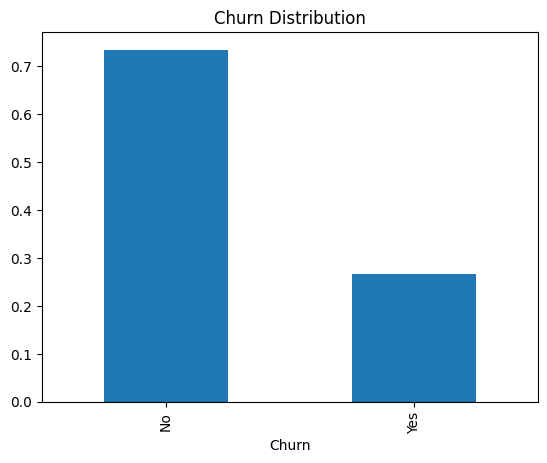

In [205]:
# Categorical Features:

# We'll examine the distribution of key categorical variables and the target.

# Target variable: Churn

df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')
plt.show()

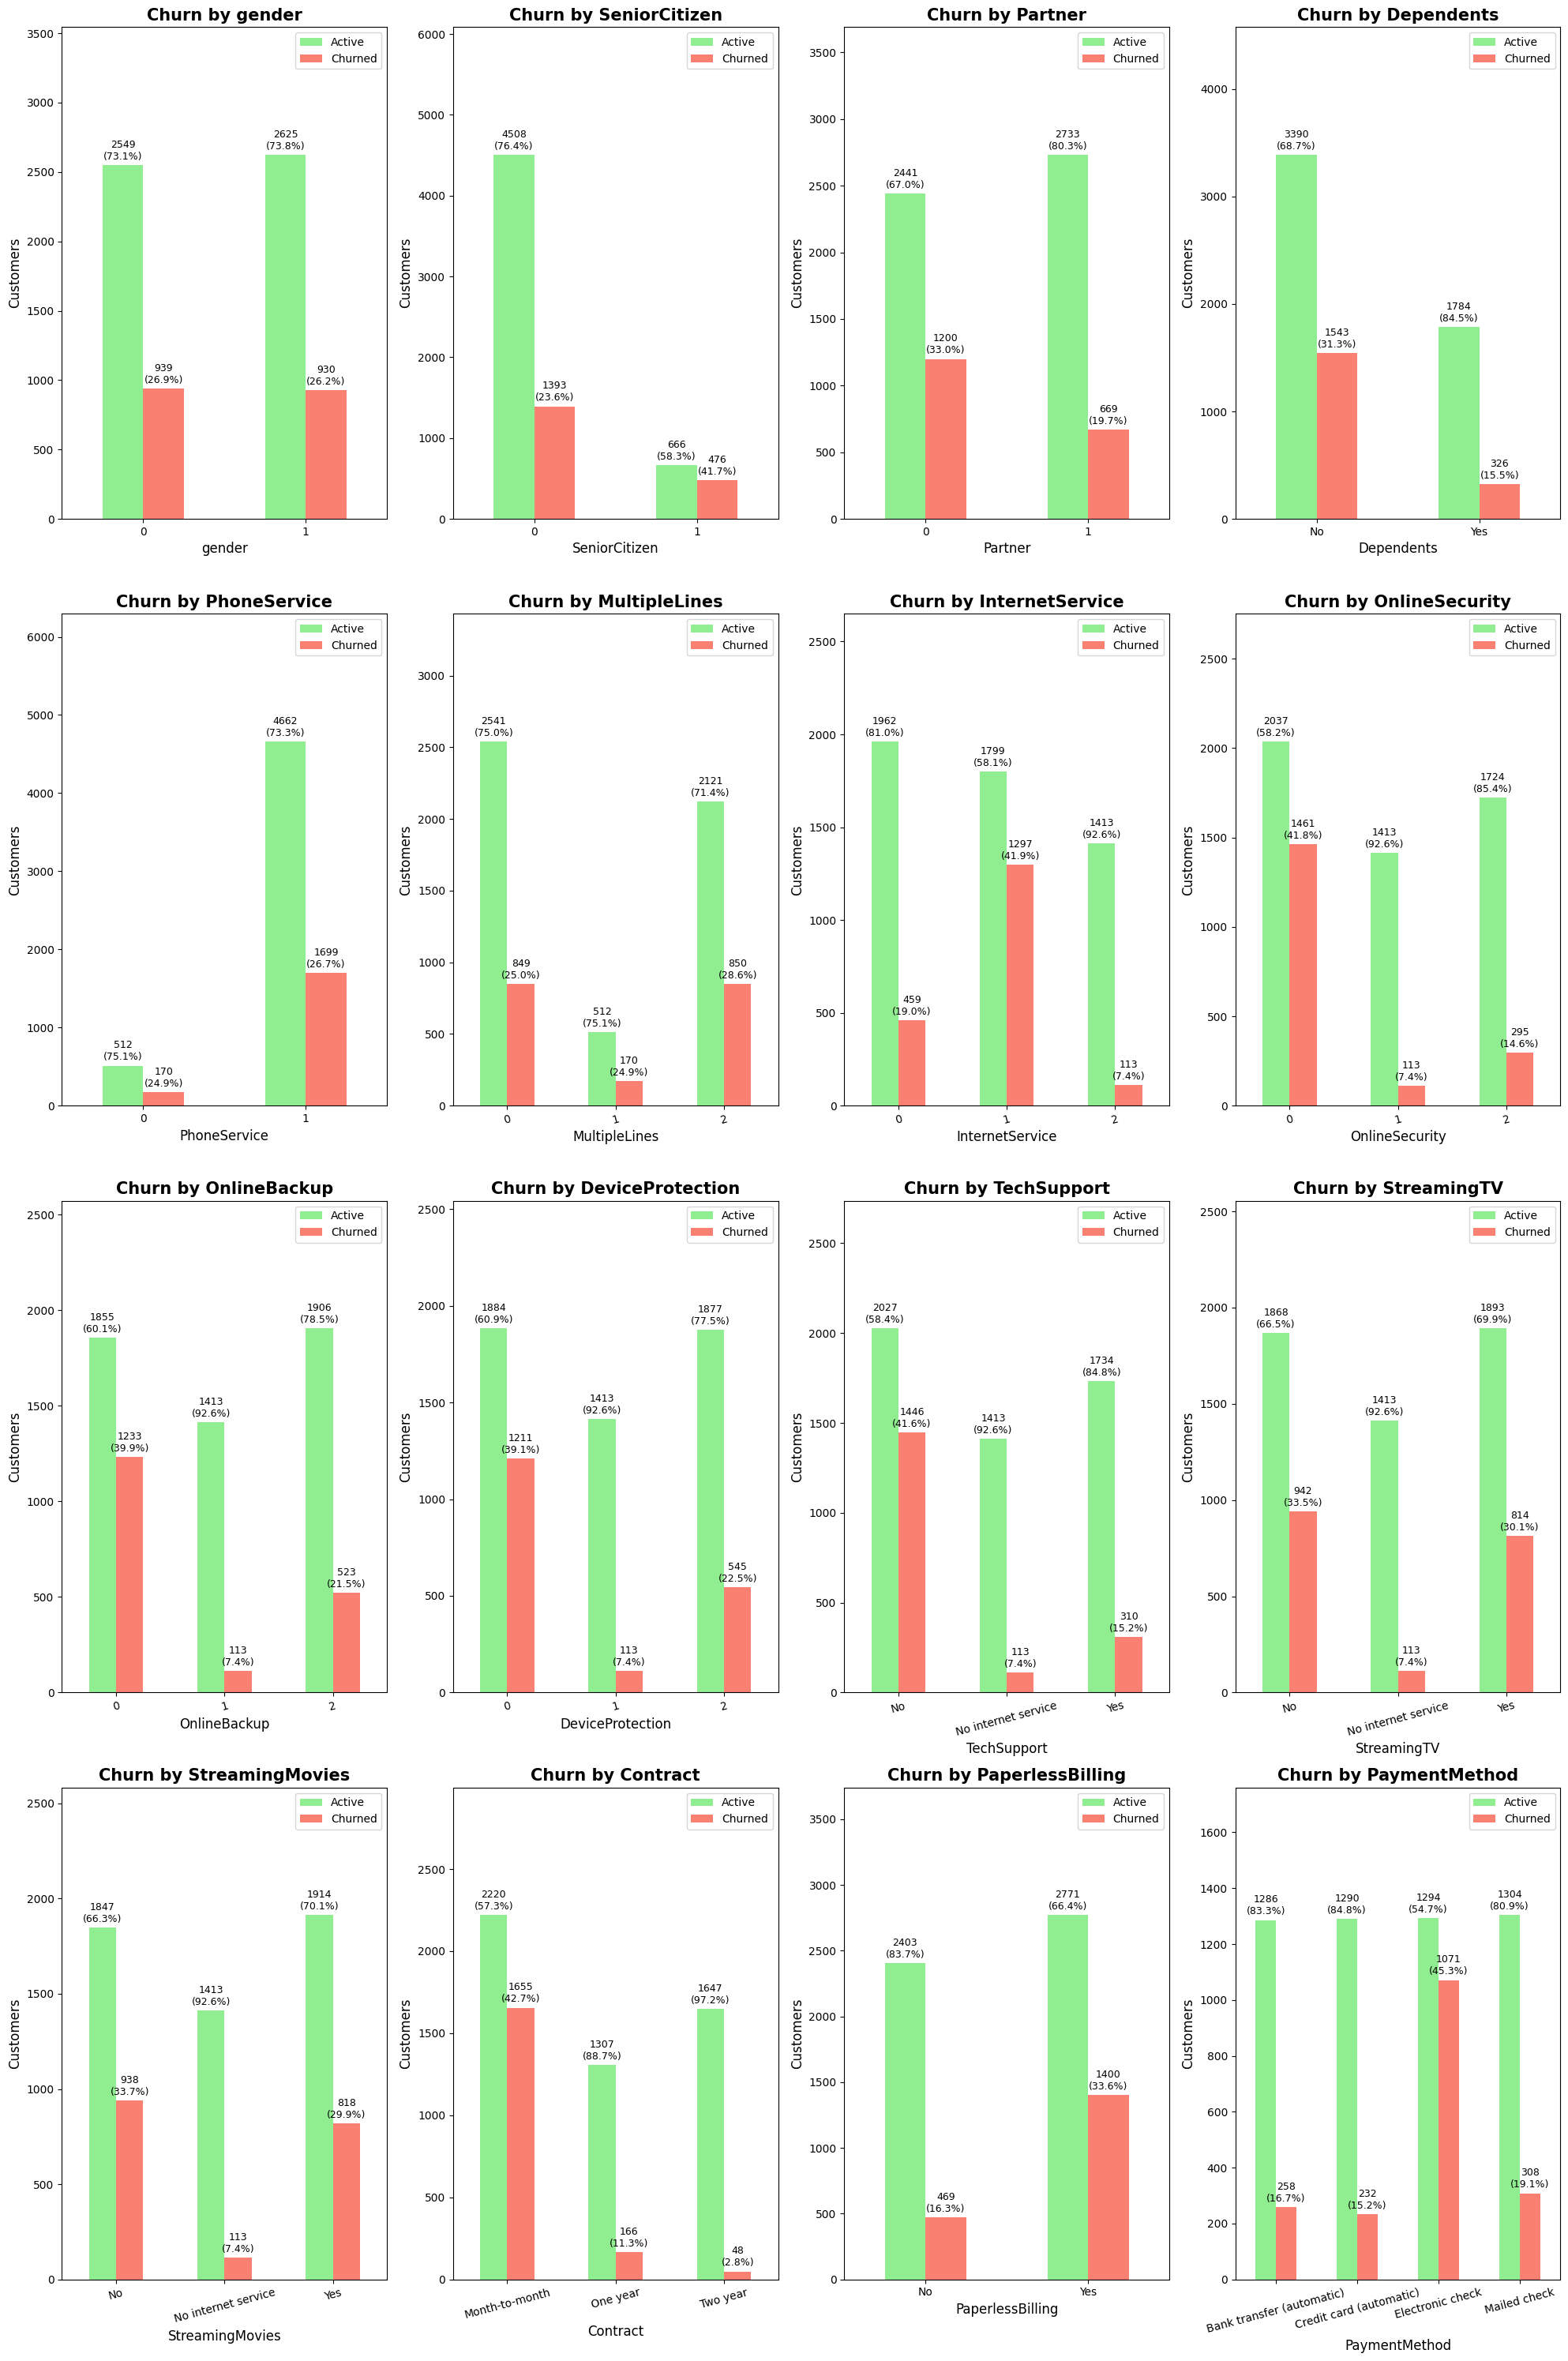

In [ ]:
# Complete list of features (15 total)
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod'
]


# 1. Create a 4x4 grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Calculate Counts and Percentages
    ct = pd.crosstab(df[col], df["Churn"])
    ct_pct = ct.div(ct.sum(1), axis=0) * 100
    
    # 2. Plot on the specific subplot
    ct.plot(kind="bar", ax=axes[i], color=['lightgreen', 'salmon'], rot=0)
    
    # 3. Add Labels (Count & %)
    for j, container in enumerate(axes[i].containers):
        pct_labels = ct_pct.iloc[:, j].values 
        labels = [f'{int(v.get_height())}\n({p:.1f}%)' if v.get_height() > 0 else '' 
                  for v, p in zip(container, pct_labels)]
        
        axes[i].bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=9)
    
    # Formatting
    axes[i].set_title(f"Churn by {col}", fontsize=15, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Customers", fontsize=12)
    axes[i].legend(["Active", "Churned"], fontsize=10)
    axes[i].set_ylim(0, ct.values.max() * 1.35) # Adjusted for taller labels
    
    # Rotate x-labels for columns with long category names (like PaymentMethod)
    if df[col].nunique() > 2:
        axes[i].tick_params(axis='x', labelrotation=15)

# 4. Clean up layout
plt.tight_layout()
plt.show()

Key observations:

* Gender: Nearly balanced (male/female ~50%).

* SeniorCitizen: Only ~16% are seniors.

* Partner/Dependents: ~48% have partner, ~30% have dependents.

* PhoneService: ~90% have phone service.

* InternetService: Most common is fiber optic (~44%), then DSL (~34%), and ~22% with no internet.

* OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Majority are "No" or "No internet service".

* Contract: Month-to-month is most common (~55%), followed by two year (~24%) and one year (~21%).

* PaperlessBilling: ~60% use paperless billing.

* PaymentMethod: Electronic check is most common (~34%), then mailed check, bank transfer, credit card.

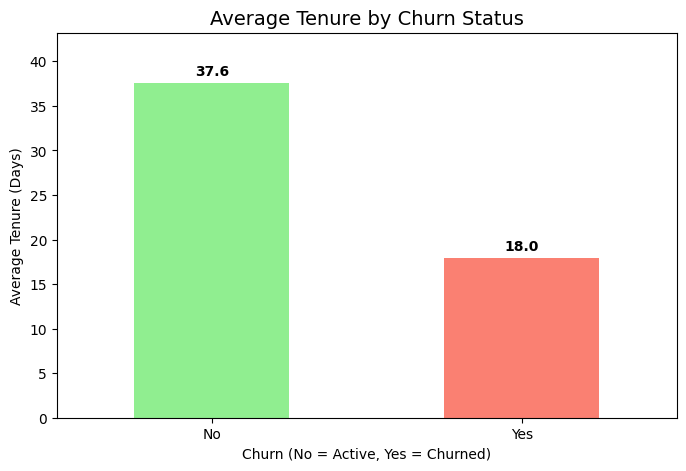

In [234]:
# Tenure vs Churn


ax = df.groupby("Churn")["tenure"].mean().plot(
    kind="bar",
    figsize=(8,5),
    color=['lightgreen', 'salmon'],
    rot=0
)

# 2. Add labels on top of the bars
for container in ax.containers:
    # Formats the mean to 1 decimal place
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3, fontweight='bold')

# Titles and labels
plt.title("Average Tenure by Churn Status", fontsize=14)
plt.xlabel("Churn (No = Active, Yes = Churned)")
plt.ylabel("Average Tenure (Days)")

# Optional: Increase y-limit to make room for labels
plt.ylim(0, df.groupby("Churn")["tenure"].mean().max() * 1.15)

plt.show()

# Univariate Analysis

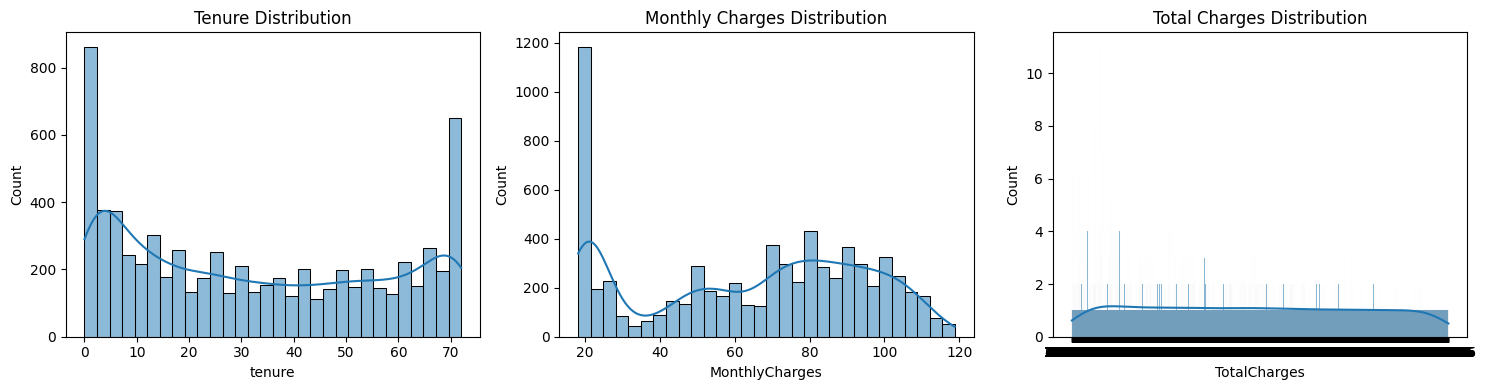

In [235]:
# Numerical Features :

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['tenure'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Tenure Distribution')

sns.histplot(df['MonthlyCharges'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

sns.histplot(df['TotalCharges'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()


* Observations:

* Tenure: – many customers are either very new (0-10 months) or long-term (60+ months).

* MonthlyCharges: – peaks around $20 (basic service) and $80-100 (premium services).

* TotalCharges: Right-skewed, with a long tail – most customers have low total charges (new or low monthly charges).

# Bivariate Analysis (Relationship with Churn)

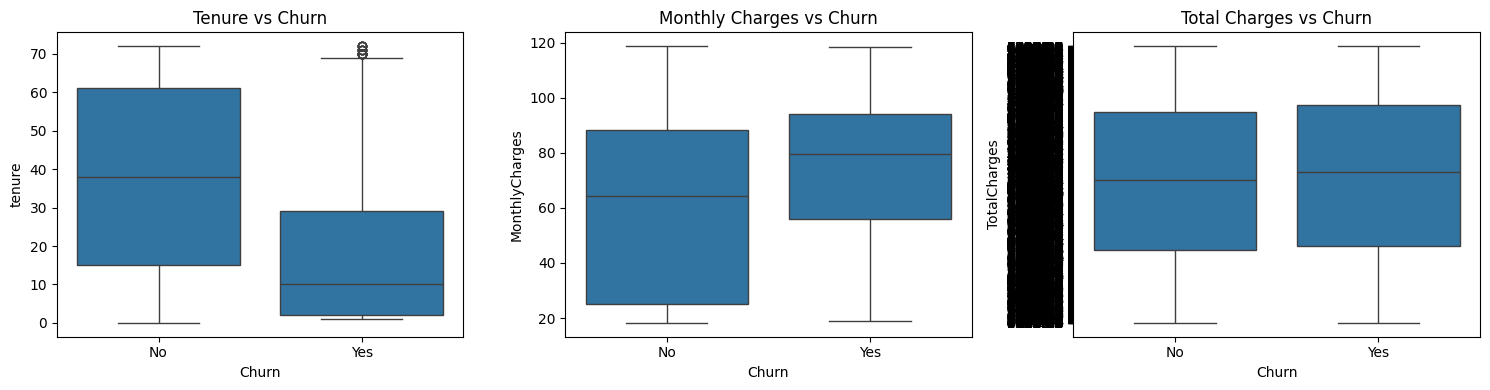

In [236]:
# Numerical Features vs. Churn

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2])
axes[2].set_title('Total Charges vs Churn')
plt.tight_layout()
plt.show()

Insights:

- Tenure: Customers who churn have significantly lower tenure (median ~10 months) compared to non-churners (median ~38 months).

- MonthlyCharges: Churners tend to have higher monthly charges (median ~80) vs non-churners (median ~65).

- TotalCharges: Churners have lower total charges (median ~500) – likely because they are newer customers.

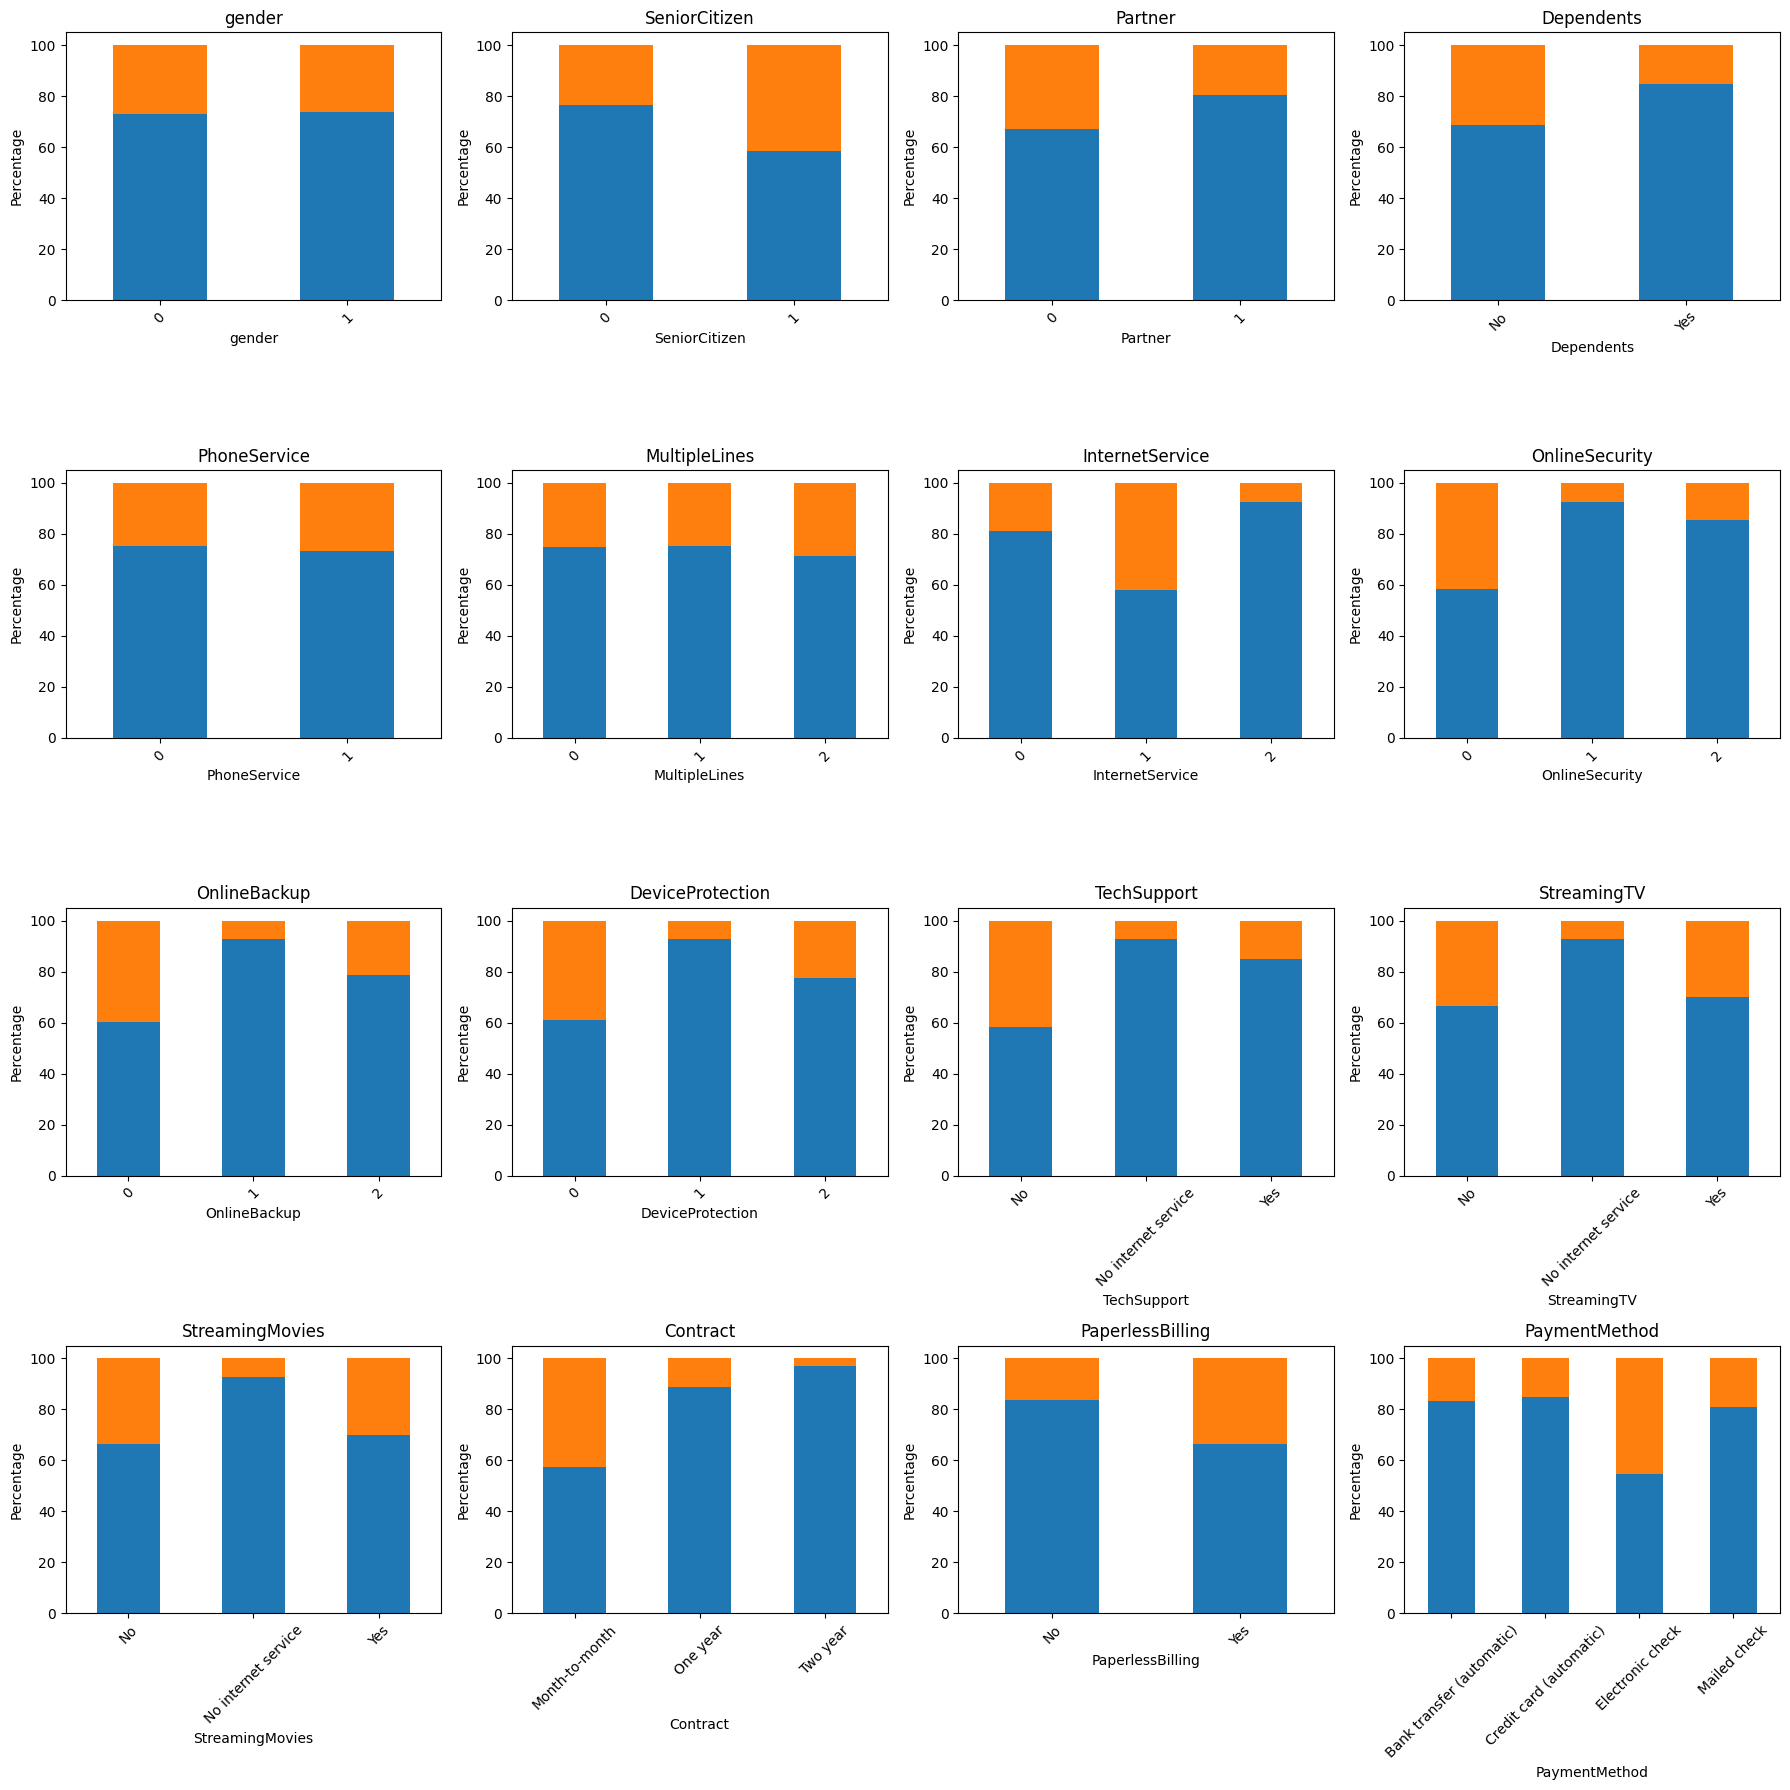

In [237]:
# Categorical Features vs. Churn 

def churn_rate_by_category(col):
    return df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    churn_rate_by_category(col).plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(col)
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Key observations:

- Gender: Nearly balanced (male/female ~50%).

- SeniorCitizen: Only ~16% are seniors.

- Partner/Dependents: ~48% have partner, ~30% have dependents.

- PhoneService: ~90% have phone service.

- InternetService: Most common is fiber optic (~44%), then DSL (~34%), and ~22% with no internet.

- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Majority are "No" or "No internet service".

- Contract: Month-to-month is most common (~55%), followed by two year (~24%) and one year (~21%).

- PaperlessBilling: ~60% use paperless billing.

- PaymentMethod: Electronic check is most common (~34%), then mailed check, bank transfer, credit card.

# Bivariate Analysis (Relationship with Churn)

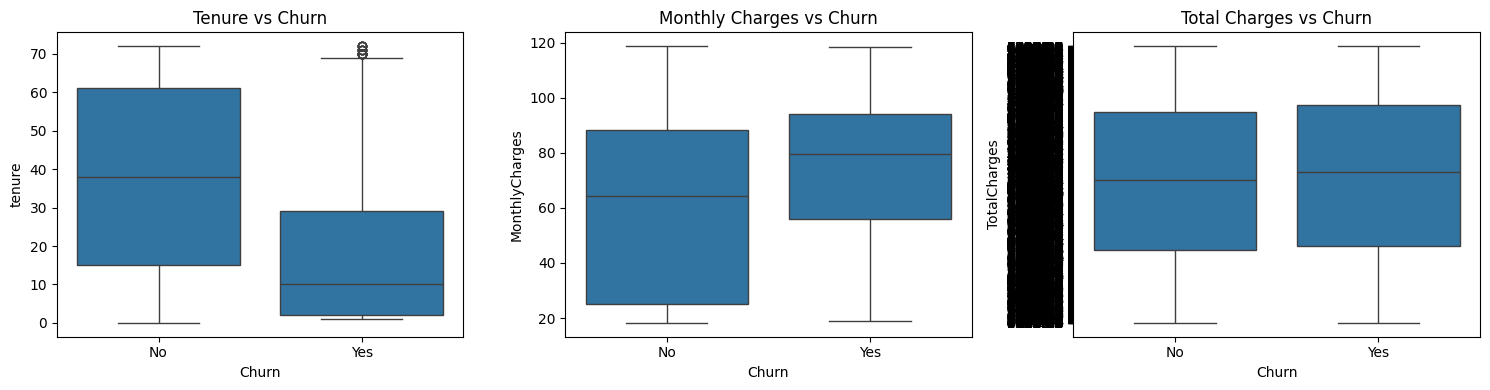

In [241]:
# Numerical Features vs. Churn

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2])
axes[2].set_title('Total Charges vs Churn')
plt.tight_layout()
plt.show()

Insights:

- Tenure: Customers who churn have significantly lower tenure (median ~10 months) compared to non-churners (median ~38 months).

- MonthlyCharges: Churners tend to have higher monthly charges (median ~80) vs non-churners (median ~65).

- TotalCharges: Churners have lower total charges (median ~500) – likely because they are newer customers.

# Correlation Analysis 

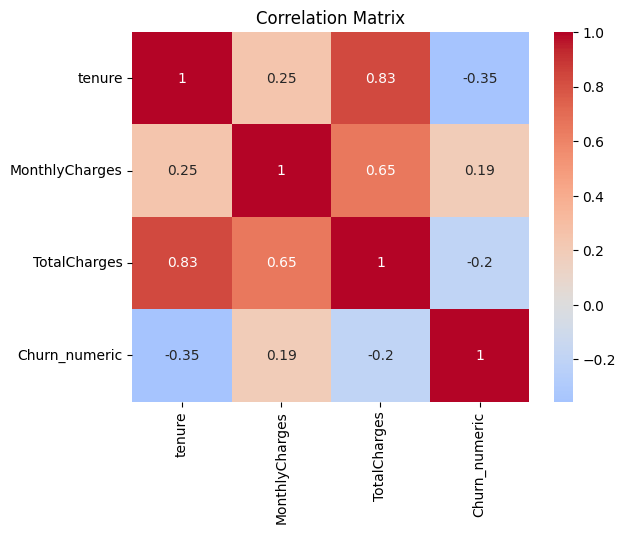

In [288]:
# Encode churn as numeric
df['Churn_numeric'] = (df['Churn'] == 'Yes').astype(int)

#Data Cleaning
df["TotalCharges"].dtype
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

 # Advanced Bivariate Analysis

C:\Users\A02348\AppData\Local\Temp\ipykernel_34132\3374525592.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100


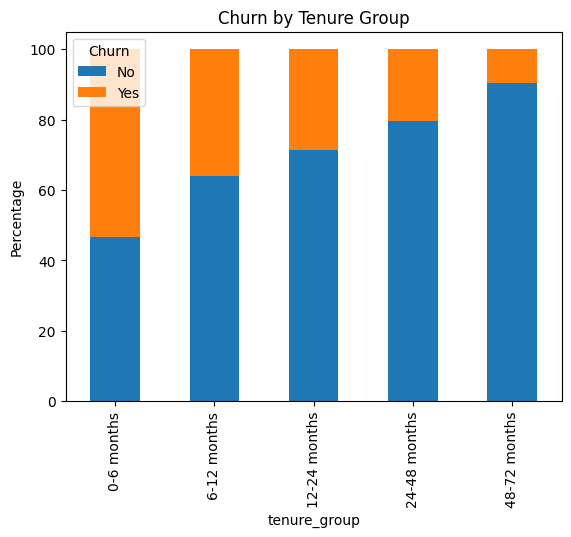

In [292]:
# Create tenure bins and see churn rate :

df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 48, 72], 
                             labels=['0-6 months', '6-12 months', '12-24 months', '24-48 months', '48-72 months'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_tenure.plot(kind='bar', stacked=True)
plt.title('Churn by Tenure Group')
plt.ylabel('Percentage')
plt.show()

- Churn rate drops sharply after first 6 months: ~50% in first 6 months, ~30% in 6-12, then declines further.

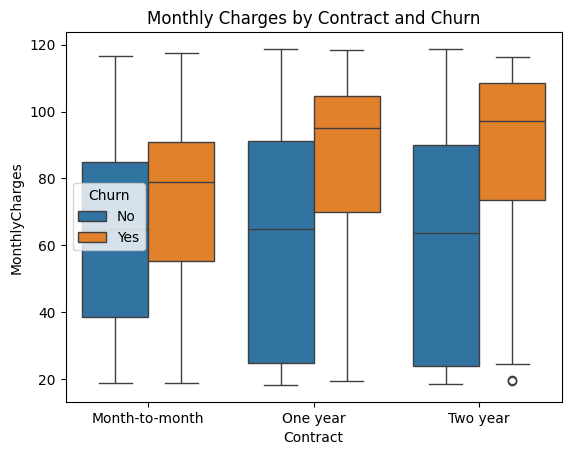

In [296]:
 # Monthly charges and contract type :

sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract and Churn')
plt.show()

- Month-to-month customers have higher median monthly charges, and among them churners have even higher charges.

# 8. ENCODING CATEGORICAL DATA

In [301]:

cat_cols = ["gender", "SeniorCitizen", "Partner", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection"]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [302]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn,Churn_numeric,tenure_group
0,7590-VHVEG,0,0,1,No,1,0,1,0,0,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0-6 months
1,5575-GNVDE,1,0,0,No,34,1,0,0,2,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,24-48 months
2,3668-QPYBK,1,0,0,No,2,1,0,0,2,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,0-6 months
3,7795-CFOCW,1,0,0,No,45,0,1,0,2,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,24-48 months
4,9237-HQITU,0,0,0,No,2,1,0,1,0,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,0-6 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,Yes,24,1,2,0,2,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1,0,12-24 months
7039,2234-XADUH,0,0,1,Yes,72,1,2,1,0,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1,0,48-72 months
7040,4801-JZAZL,0,0,1,Yes,11,0,1,0,2,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0,6-12 months
7041,8361-LTMKD,1,1,1,No,4,1,2,1,0,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,1,0-6 months


# 9. MODEL DATASET

In [303]:

features = [
    "age",
    "Service_Price",
    "tenure_days",
    "gender",
    "product",
    "Service_type",
    "channel",
    "reason"
]

X = df[features]
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

KeyError: "['age', 'Service_Price', 'tenure_days', 'product', 'Service_type', 'channel', 'reason'] not in index"